## TWITTER SENTIMENT ANALYSIS

Importing the data

In [ ]:
import nltk
import pandas as pd
import csv
import string
import re
from bs4 import BeautifulSoup as bs
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Uploading the file from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the file and cleaning the twitter dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/twitter.csv",encoding = "latin-1")

In [ ]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.shape

(1599999, 6)

Adding column names 

In [ ]:
column_names=["Target","ids","date","Flag","id","tweet"]

# Add column names while reading a CSV file
df = pd.read_csv("/content/drive/MyDrive/twitter.csv",encoding = "latin-1", names=column_names)

In [ ]:
df.head()

,Target,ids,date,Flag,id,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

Data cleaning and Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   id      1600000 non-null  object
 5   tweet   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
#dropping the unwanted feature
df.drop(["ids","date","Flag","id"],axis=1,inplace=True) #sentimental analysis

In [ ]:
df.head()

,Target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.tail()

,Target,tweet
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
df.describe()

,Target
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


Pre-processing the data
Some common Problems:

    Remove Punctuation
    Replace short words
    Making text lower case
    Remove stopwords
    Lemmatization

Removing punctuation (.!<>{}’,”(/)-)

In [ ]:
df["tweet"]

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: tweet, Length: 1600000, dtype: object

In [ ]:
# Replacing punctuations with space
df['tweet_processed'] = df['tweet'].str.replace("[^a-zA-Z0-9]", " ")

In [ ]:
df['tweet_processed']

0           switchfoot http   twitpic com 2y1zl   Awww  t...
1          is upset that he can t update his Facebook by ...
2           Kenichan I dived many times for the ball  Man...
3            my whole body feels itchy and like its on fire 
4           nationwideclass no  it s not behaving at all ...
                                 ...                        
1599995    Just woke up  Having no school is the best fee...
1599996    TheWDB com   Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover  Ask me f...
1599998    Happy 38th Birthday to my boo of alll time    ...
1599999    happy  charitytuesday  theNSPCC  SparksCharity...
Name: tweet_processed, Length: 1600000, dtype: object

Replacing short words

In [ ]:
df['tweet_processed'] = df['tweet_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
df['tweet_processed']

0          switchfoot http twitpic com 2y1zl Awww that bu...
1          upset that can update his Facebook texting and...
2          Kenichan dived many times for the ball Managed...
3                   whole body feels itchy and like its fire
4          nationwideclass not behaving all mad why here ...
                                 ...                        
1599995        Just woke Having school the best feeling ever
1599996    TheWDB com Very cool hear old Walt interviews ...
1599997    Are you ready for your MoJo Makeover Ask for d...
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: tweet_processed, Length: 1600000, dtype: object

LowerCase character

In [ ]:
# make entire text lowercase
df['tweet_processed'] = [row.lower() for row in df['tweet_processed']]

In [ ]:
df['tweet_processed']

0          switchfoot http twitpic com 2y1zl awww that bu...
1          upset that can update his facebook texting and...
2          kenichan dived many times for the ball managed...
3                   whole body feels itchy and like its fire
4          nationwideclass not behaving all mad why here ...
                                 ...                        
1599995        just woke having school the best feeling ever
1599996    thewdb com very cool hear old walt interviews ...
1599997    are you ready for your mojo makeover ask for d...
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: tweet_processed, Length: 1600000, dtype: object

Remove stop words

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','see','movies','get','makes','making','time','watch','character','good','like','well','would']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(tweets):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    tweet_tokenized = word_tokenize(tweets)
    tweet_new = " ".join([i for i in tweet_tokenized  if i not in stop_words])
    return tweet_new

# Removing stopwords
df['tweet_processed'] = [remove_stopwords(r) for r in df['tweet_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['tweet_processed']

0          switchfoot http twitpic com 2y1zl awww bummer ...
1          upset update facebook texting might cry result...
2          kenichan dived many times ball managed save re...
3                                whole body feels itchy fire
4                               nationwideclass behaving mad
                                 ...                        
1599995                        woke school best feeling ever
1599996    thewdb com cool hear old walt interviews http ...
1599997                      ready mojo makeover ask details
1599998      happy 38th birthday boo alll tupac amaru shakur
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: tweet_processed, Length: 1600000, dtype: object

Lemmatization

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['tweet_processed'] = df['tweet_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


1) split sentence into words 2) get the detailed POS for each word 3) get shallow POS from detailed POS 4) do lemmatisation for each word 5) join all the words to form sentence 

In [ ]:
df['tweet_processed']

0          switchfoot http twitpic com 2y1zl awww bummer ...
1          upset update facebook texting might cry result...
2          kenichan dive many time ball manage save rest ...
3                                 whole body feel itchy fire
4                               nationwideclass behaving mad
                                 ...                        
1599995                        woke school best feeling ever
1599996    thewdb com cool hear old walt interview http b...
1599997                       ready mojo makeover ask detail
1599998      happy 38th birthday boo alll tupac amaru shakur
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: tweet_processed, Length: 1600000, dtype: object

Plotting Freqent Words

In [ ]:
df

,Target,tweet,tweet_processed
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com 2y1zl awww bummer ...
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive many time ball manage save rest ...
3,0,my whole body feels itchy and like its on fire,whole body feel itchy fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview http b...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday boo alll tupac amaru shakur


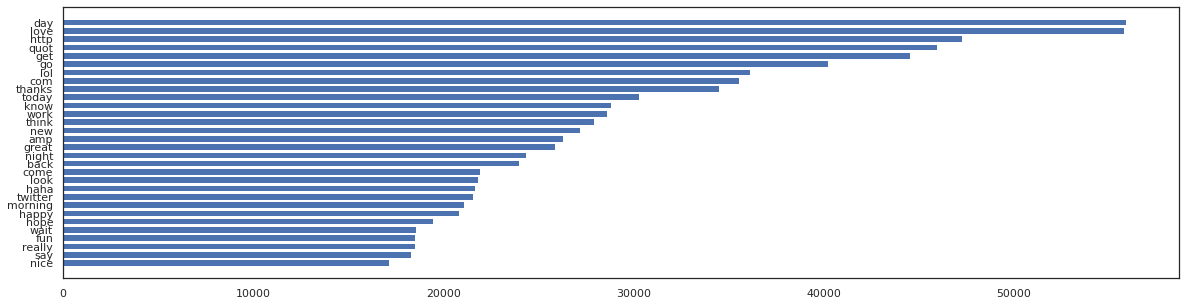

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['Target'] == 4,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['tweet_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

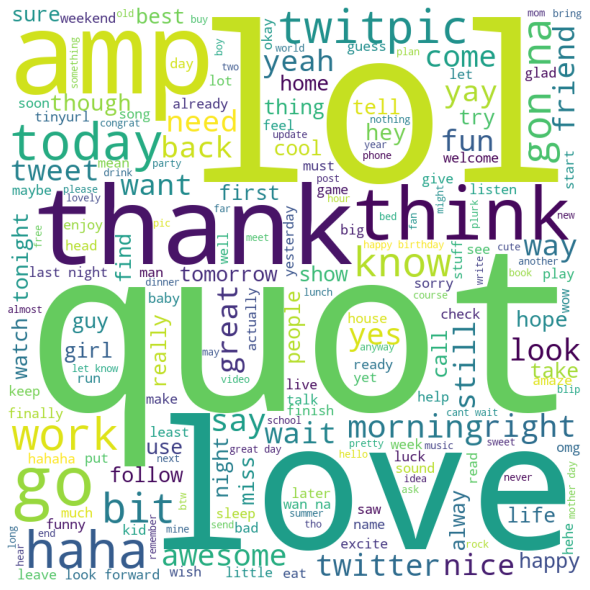

In [ ]:
##
## Building a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['Target'] == 4 ,:]
all_words = ' '.join([text for text in word_cloud_df['tweet_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

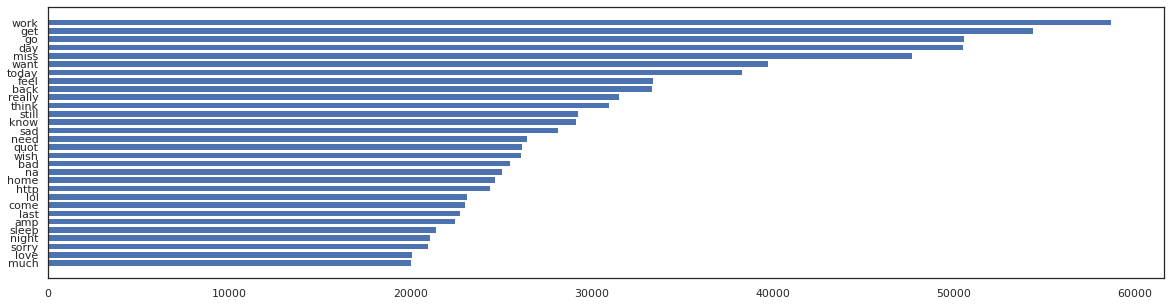

In [ ]:
##
## Plotting most frequent words from negative reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['Target'] == 0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['tweet_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

Model - Training

Its a binary classification data with only positive=4 and negative=0 comments... 

Therefore we are adopting Logistic Regression Algorithm....

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df.Target.value_counts()

0    800000
4    800000
Name: Target, dtype: int64

In [ ]:

x=df['tweet_processed']
y=df['Target']

x, y




(0          switchfoot http twitpic com 2y1zl awww bummer ...
 1          upset update facebook texting might cry result...
 2          kenichan dive many time ball manage save rest ...
 3                                 whole body feel itchy fire
 4                               nationwideclass behaving mad
                                  ...                        
 1599995                        woke school best feeling ever
 1599996    thewdb com cool hear old walt interview http b...
 1599997                       ready mojo makeover ask detail
 1599998      happy 38th birthday boo alll tupac amaru shakur
 1599999    happy charitytuesday thenspcc sparkscharity sp...
 Name: tweet_processed, Length: 1600000, dtype: object, 0          0
 1          0
 2          0
 3          0
 4          0
           ..
 1599995    4
 1599996    4
 1599997    4
 1599998    4
 1599999    4
 Name: Target, Length: 1600000, dtype: int64)

Using CountVectorizer to modify the categorical data "object = string" to "numerical = integer or float" to avoid value errors

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
#score of the model
model.score(x_test,y_test)

0.7703479166666667

Cross - Validation

In [ ]:
cross_val_score(model,x,y,cv=5).mean()

0.76191375

Confusion matrix

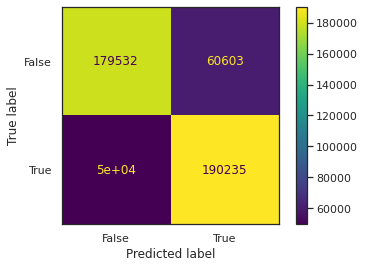

In [ ]:
con=metrics.confusion_matrix(y_test,model.predict(x_test))
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[False,True])
cm_display.plot()

SGD - Stochastic Gradient Descent Algorithm

To view the Linear Clasification under Convex loss functions

In [ ]:
model1=SGDClassifier(alpha=0.00001)
model1.fit(x_train,y_train)
#score of the model
model1.score(x_test,y_test)

0.7699375

In [ ]:
cross_val_score(model1,x,y,cv=5).mean()

0.763055625

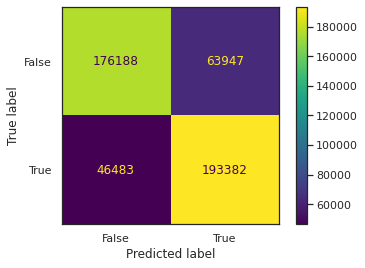

In [ ]:
con=metrics.confusion_matrix(y_test,model1.predict(x_test))
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[False,True])
cm_display.plot()

Evaluating the model

In [ ]:
y_pred=model.predict(x_test)

Logistic Regression Evaluation

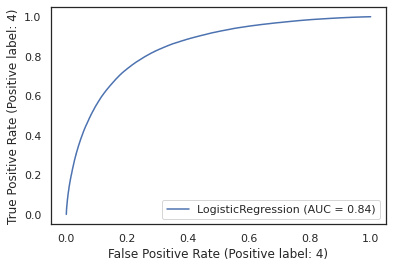

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
# f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
plot_roc_curve(model, x_test, y_test)
#accuracy_score(y_test,y_pred)

AUROC Score obtained on Logistic Regression Evaluation of the twitter data = 0.84


SGD Evaluation

In [ ]:
y_pred=model1.predict(x_test)

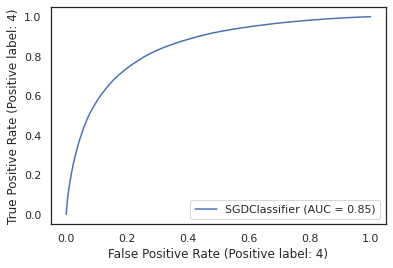

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

plot_roc_curve(model1, x_test, y_test)


AUROC Score obtained on SGD Evaluation of the twitter data = 0.85

Higher the AUROC Score, best is the model data

Summary:

Comparing the positive and negative tweets from Twitter sentiment data using Logistic Regression and Gradient Descent Algorithms of Machine Learning.. 

Positive tweets are equal to the negative tweets....

Both models Gives the results almost equal with only minor differences, In which SGD classifier gives the best Evaluation Metrics